In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("C:\\Users\\Priya\\Downloads\\books.csv")

In [12]:
#How many rows and columns are there in books.csv dataset?
df.shape

(399, 24)

In [13]:
#How many books do not have an original title?
missing_original_titles_count = df['original_title'].isnull().sum()
print(f'Number of books without original title: {missing_original_titles_count}')

Number of books without original title: 36


In [14]:
#How many unique books are present in the dataset ?
#Evaluate based on the 'book_id' after removing null values in the original_title column.
df_cleaned = df[df['original_title'].notnull()]
unique_books_count = df_cleaned['book_id'].nunique()

print("Number of unique books after removing null 'original_title':", unique_books_count)

Number of unique books after removing null 'original_title': 363


In [15]:
#What is the average rating of all the books in the dataset based on ‘average_rating’?
average_rating = df['average_rating'].mean()
print(f'Average rating of all books:,{average_rating:.4f}')

Average rating of all books:,3.9838


In [16]:
#Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.
books_published_2000 = df[df['original_publication_year'] == 2000].shape[0]

print("Number of books published in the year 2000:", books_published_2000)

Number of books published in the year 2000: 8


In [17]:
#Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.
max_ratings_book = df[df['work_ratings_count'] == df['work_ratings_count'].max()]['title'].iloc[0]
print("Book with the maximum ratings count:", max_ratings_book)

Book with the maximum ratings count: The Diary of a Young Girl


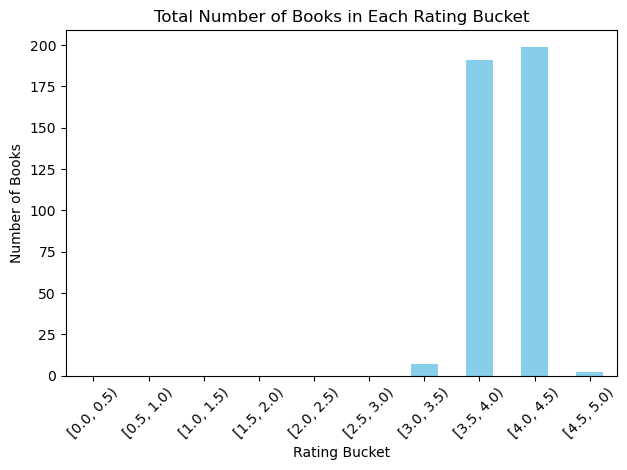

In [18]:
#Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.
buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
df['rating_bucket'] = pd.cut(df['average_rating'], bins=buckets, right=False)
books_in_buckets = df.groupby('rating_bucket').size()

books_in_buckets.plot(kind='bar', color='skyblue')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Total Number of Books in Each Rating Bucket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()